In [1]:
!pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 932.9 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/9.7 MB 987.4 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/9.7 MB 1.0 MB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.7 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.7 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.7 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.7 MB 1.2 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/9.7 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.7 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.7 MB 1.1 MB/s eta 0:00:07
   ----------- --------------

In [39]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
driver = webdriver.Chrome()
driver.get("https://www.youtube.com/feed/trending")

In [17]:
videos=driver.find_elements(By.CSS_SELECTOR, "#dismissible")

In [19]:
data={
    "Title" : [],
    "Views" : [],
    "Creator" : [],
    "Time" : [],
    "Link" : []
}

In [11]:
data

{'Title': [], 'Views': [], 'Creator': [], 'Time': [], 'Link': []}

In [23]:
for video in videos:
    title=video.find_element(By.CSS_SELECTOR, "#video-title > yt-formatted-string").text
    data["Title"].append(title)
    views=video.find_element(By.CSS_SELECTOR, "#metadata-line > span:nth-child(3)").text
    data["Views"].append(views)
    creator=video.find_element(By.CSS_SELECTOR, "#text > a").text
    data["Creator"].append(title)
    time=video.find_element(By.CSS_SELECTOR, "#metadata-line > span:nth-child(4)").text
    data["Time"].append(time)
    link=video.find_element(By.CSS_SELECTOR, "#thumbnail").get_attribute('href')
    data["Link"].append(link)

In [24]:
data

{'Title': ['1, 2, 3, 4, 5, 6, 7, 8, 9 🙈⚽️',
  '1, 2, 3, 4, 5, 6, 7, 8, 9 🙈⚽️',
  'Motorbike Smashes Into Porsche! 😱',
  'Players vs Pitch 🤯',
  'VO CENTAR Covekot sto gi "apsese" Saso Mijalkov i Jordan Kamcev!?',
  'The Game of Life🎮',
  'PRIME 5 - Big Brother VIP Kosova 3 - 01.11.2024',
  '小路飞还不知道他把路飞给擦没有了 #路飞#海贼王',
  'Car Bubble vs Lamborghini',
  'They Chose Kindness Over Abuse in Their Team #shorts',
  'Perfect Pitch Challenge? Easy! 🎤😎| Free Fire Official',
  '#JasonDeruloTV // OMG 😳 #GotPermissionToPost From @guiapsico_ #JalebiBaby',
  'When u fight over the armrest',
  'VO CENTAR Vistinata za Aracinovo, UCK kidnapirase biznismeni Albanci!?',
  'SANDRA AFRIKA & MC STOJAN - CAK CAK (OFFICIAL VIDEO)',
  'Leyla: Hayat…Aşk…Adalet... 7. Bölüm',
  'Trapped by the Machine, Saved by Kind Strangers! #shorts',
  'How Strong is Tin Foil? 💪',
  'Different people giving you 🧻🚽#VictoriaPfeifer #shorts',
  'Trick-or-Treating in a Rush. Part 2',
  'SLUPAO MI JE AUTO KAMERMAN!!',
  'Disrespect or

In [27]:
df = pd.DataFrame(data)
df

,Title,Views,Creator,Time,Link
0,"1, 2, 3, 4, 5, 6, 7, 8, 9 🙈⚽️",36M views,"1, 2, 3, 4, 5, 6, 7, 8, 9 🙈⚽️",5 days ago,https://www.youtube.com/shorts/C1JQDkeUM3c
1,"1, 2, 3, 4, 5, 6, 7, 8, 9 🙈⚽️",36M views,"1, 2, 3, 4, 5, 6, 7, 8, 9 🙈⚽️",5 days ago,https://www.youtube.com/shorts/C1JQDkeUM3c
2,Motorbike Smashes Into Porsche! 😱,18M views,Motorbike Smashes Into Porsche! 😱,5 days ago,https://www.youtube.com/shorts/Q3woJb3ZxnA
3,Players vs Pitch 🤯,40M views,Players vs Pitch 🤯,3 days ago,https://www.youtube.com/shorts/-jvfnm40wO4
4,"VO CENTAR Covekot sto gi ""apsese"" Saso Mijalko...",58K views,"VO CENTAR Covekot sto gi ""apsese"" Saso Mijalko...",1 day ago,https://www.youtube.com/watch?v=gfbTvLqpz_E
...,...,...,...,...,...
93,irl Ballon d’Or stream 🏆 2024,12M views,irl Ballon d’Or stream 🏆 2024,Streamed 7 days ago,https://www.youtube.com/watch?v=WHgJX12AhTQ
94,Hudutsuz Sevda 39. Bölüm,2.5M views,Hudutsuz Sevda 39. Bölüm,4 days ago,https://www.youtube.com/watch?v=ybQi03ELKJU
95,PRIME 6 - Big Brother VIP Kosova 3 - 04.11.2024,986K views,PRIME 6 - Big Brother VIP Kosova 3 - 04.11.2024,Streamed 15 hours ago,https://www.youtube.com/watch?v=NYxlcQIfBTc
96,MAGIC TIME ⁠@Whoispelagheya,37M views,MAGIC TIME ⁠@Whoispelagheya,9 days ago,https://www.youtube.com/shorts/re-k88xk9io


In [67]:
def only_numbers(videos):
    numeric_views = []
    
    # Loop through each video WebElement in the list 'videos'
    for video in videos:
        # Extract the views count from the WebElement
        views = video.find_element(By.CSS_SELECTOR, "#metadata-line > span:nth-child(3)").text
        
        # Remove the 'views' part and strip spaces
        views = views.replace(' views', '').strip()

        # Handle 'M' (Millions) case (e.g., '3.5M')
        if 'M' in views:
            numeric_views.append(int(float(views.replace('M', '').strip()) * 1_000_000))
        # Handle 'K' (Thousands) case (e.g., '100K')
        elif 'K' in views:
            numeric_views.append(int(float(views.replace('K', '').strip()) * 1_000))
        # Handle raw numbers without 'M' or 'K' (e.g., '150,000')
        else:
            numeric_views.append(int(views.replace(',', '').strip()))
    
    return numeric_views


[36000000, 18000000, 40000000, 58000, 34000000, 1000000, 58000000, 29000000, 4200000, 58000000, 7600000, 14000000, 122000, 3500000, 3800000, 9400000, 61000000, 19000000, 21000000, 271000, 18000000, 10000000, 9200000, 986000, 876000, 1400000, 42000000, 8800000, 22000000, 43000, 12000000, 2500000, 18000000, 6400000, 12000000, 6200000, 28000000, 3900000, 71000, 12000000, 12000000, 295000, 184000000, 993000, 21000000, 37000000, 1900000, 79000000, 8500000, 38000000, 34000000, 40000000, 4400000, 122000, 61000000, 58000000, 1000000, 58000, 29000000, 58000000, 7600000, 3800000, 184000000, 14000000, 4200000, 42000000, 19000000, 307000000, 9400000, 876000, 1700000, 22000000, 28000000, 71000, 21000000, 18000000, 10000000, 79000000, 993000, 2600000, 271000, 9200000, 295000, 12000000, 165000000, 1400000, 8800000, 43000, 21000000, 8500000, 129000000, 12000000, 2500000, 986000, 37000000, 60000000]


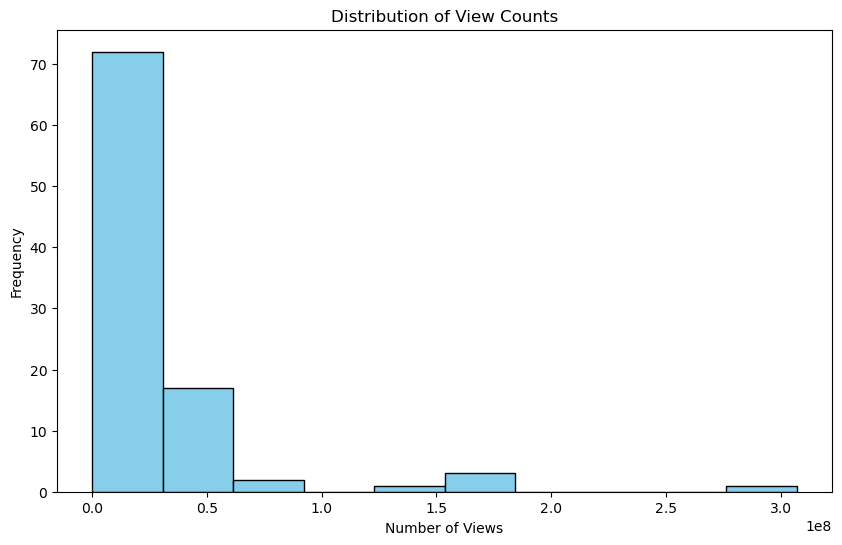

In [71]:
# Assuming you have already initialized your WebDriver and found the videos
videos = driver.find_elements(By.CSS_SELECTOR, "ytd-video-renderer")  # Example selector

# Call the function to process the view counts
numeric_views = only_numbers(videos)

# Print the numeric view counts to verify
print(numeric_views)

# Plot the histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(numeric_views, bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of View Counts')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()
